In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

In [2]:
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory


test = ShnitselDB[Trajectory]
# print(dir(test))
# help(test.as_frames)

# res: ShnitselDB[Trajectory] = ShnitselDB[Trajectory](children={})

# from shnitsel.data.tree.xr_conversion import xarray_datatree_to_shnitsel_tree
# xarray_datatree_to_shnitsel_tree({}, None)

In [3]:
shnitsel_db_retinal: ShnitselDB[Trajectory] = st.io.read(
    'tut_data/traj_I02.nc', parallel=True
).set_charge(1.)  # type: ignore

## Basic datasheet test

In [4]:
from shnitsel.data.tree import CompoundInfo
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory
import xarray as xr


def set_charge(traj: Trajectory, charge):
    traj.charge = charge
    return traj


# shnitsel_db_single_nx: Trajectory = st.io.read(
#     'test_data/newtonx/test_I01_v2.6/', parallel=False
# )  # type: ignore
shnitsel_db_single_nx: ShnitselDB[Trajectory] = st.io.read(
    'test_data/newtonx/test_pyrazene_v2.6', parallel=True
)  # type: ignore
shnitsel_db_single_nx = shnitsel_db_single_nx.set_compound_info('pyrazene')

shnitsel_db_retinal: ShnitselDB[Trajectory] = st.io.read(
    'tut_data/traj_I02.nc', parallel=False
)  # type: ignore

shnitsel_db_retinal = shnitsel_db_retinal.set_charge(1)

trajectory = list(shnitsel_db_retinal.collect_data())[0]
# print(type(trajectory))
# print([x for x in dir(trajectory.dataset) if not x.startswith('_')])  # .__getattr__
# print([x for x in dir(xr.Dataset) if not x.startswith('_')])

  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
# print(shnitsel_db_retinal._repr_html_())
shnitsel_db_retinal.compounds['I02'].children['0'].data.charge
list(shnitsel_db_retinal.charge.collect_data())
# shnitsel_db_retinal.charge

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [6]:
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory, Frames

print(
    [
        d
        for d in dir(ShnitselDB)
        if not d.startswith("_") and isinstance(getattr(ShnitselDB, d, None), property)
    ]
)
print(
    [
        d
        for d in dir(ShnitselDB)
        if not d.startswith("_") and callable(getattr(ShnitselDB, d, None))
    ]
)
# print(vars(ShnitselDB))
# print(ShnitselDB.dtype)
# print(type(ShnitselDB.dtype))
print(ShnitselDB[int])
trajorframes_t = Trajectory | Frames
print(trajorframes_t)
tof_meta_t = type(trajorframes_t)
print(tof_meta_t)

print(dir(trajorframes_t))
print(trajorframes_t.__parameters__)
from typing import get_args

print(get_args(trajorframes_t))

['attrs', 'children', 'compounds', 'data', 'dtype', 'has_data', 'is_leaf', 'name', 'path']
['add_child', 'add_compound', 'add_data_group', 'apply_data_attributes', 'assign_children', 'collect_data', 'construct_copy', 'filter_nodes', 'group_children_by', 'group_data_by_metadata', 'is_level', 'map_data', 'map_filtered_nodes', 'map_flat_group_data', 'map_subtree', 'set_compound_info']
<class 'shnitsel.data.tree.tree.ShnitselDBRoot[int]'>
shnitsel.data.dataset_containers.trajectory.Trajectory | shnitsel.data.dataset_containers.frames.Frames
<class 'types.UnionType'>
['__args__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__or__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__ror__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
()
(<class 'shnitsel.data.dataset_containers.

In [7]:
from shnitsel.clean import sanity_check

# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
# shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces
# len(list(shnitsel_db_retinal.collect_data()))
shnitsel_db_retinal_filtered = sanity_check(
    shnitsel_db_retinal, drop_empty_trajectories=True
)

In [8]:
from shnitsel.clean import sanity_check

shnitsel_db_single_nx_filtered = sanity_check(
    shnitsel_db_single_nx, drop_empty_trajectories=True
)

In [9]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_retinal)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(concatted_tree, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ, structure_selection=res_sel)
res

<xarray.DataArray 'atXYZ' (frame: 6452)> Size: 26kB
array([0.10997677, 0.10950518, 0.10680151, ..., 0.14393115, 0.15356755,
       0.16359758], shape=(6452,), dtype=float32)
Coordinates:
  * frame        (frame) object 52kB MultiIndex
    charge       float64 8B 1.0
  * atrajectory  (frame) int32 26kB 1 1 1 1 1 1 1 1 ... 20 20 20 20 20 20 20 20
  * time         (frame) float64 52kB 0.0 0.5 1.0 1.5 ... 218.0 218.5 219.0

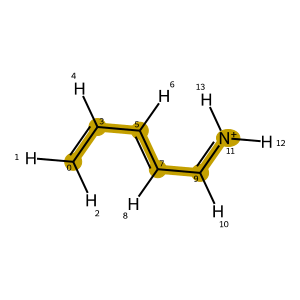

In [10]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [11]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ)
res

<xarray.DataArray 'atXYZ' (frame: 1005)> Size: 8kB
array([-0.02272949, -0.02260822, -0.02163931, ..., -0.01392826,
       -0.03541158, -0.05643772], shape=(1005,))
Coordinates:
  * frame        (frame) object 8kB MultiIndex
  * atrajectory  (frame) int32 4kB 1 1 1 1 1 1 1 1 1 ... 99 99 99 99 99 99 99 99
  * time         (frame) float64 8kB 0.0 0.5 1.0 1.5 ... 98.5 99.0 99.5 100.0

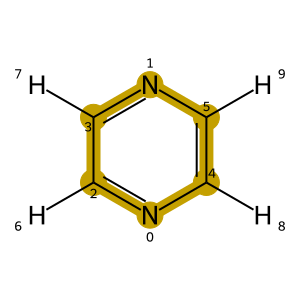

In [12]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [ ]:
from shnitsel.geo.geocalc import get_bats
import xarray as xr
from shnitsel.filtering.structure_selection import StructureSelection

dataset_tmp: Trajectory = list(shnitsel_db_retinal.collect_data())[0]
# TODO: FIXME: Pyramids have an indexer double application
structure_selection = StructureSelection.init_from_dataset(dataset_tmp, ['angles', 'dihedrals'])#, 'pyramids'])

bats_data = get_bats(shnitsel_db_retinal, structure_selection=structure_selection)

xr.concat(bats_data.collect_data(), dim='time')

ValueError: those coordinates already have an index: {'descriptor'}

In [15]:
from shnitsel.clean import sanity_check
from shnitsel.clean.filter_geo import GeometryFiltrationThresholds

geo_thresholds = GeometryFiltrationThresholds()
geo_thresholds.length_unit = 'angstrom'
geo_thresholds.match_thresholds["[#6][#1]"] = 2.0

# print(shnitsel_db_retinal)

shnitsel_db_retinal_filtered = sanity_check(
    shnitsel_db_retinal, 'truncate', geometry_thresholds=geo_thresholds
)
type(shnitsel_db_retinal_filtered)

shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]

In [16]:
from shnitsel.data.dataset_containers.shared import ShnitselDataset

print(type(("hello", ShnitselDataset(xr.Dataset()))))

<class 'tuple'>


ValueError: Failed to get default mol, please set a smiles map. For example, if the compound has charge c and frame i contains a representative geometry, use frames.attrs['smiles_map'] = frames.atXYZ.isel(frame=i).st.get_smiles_map(charge=c)

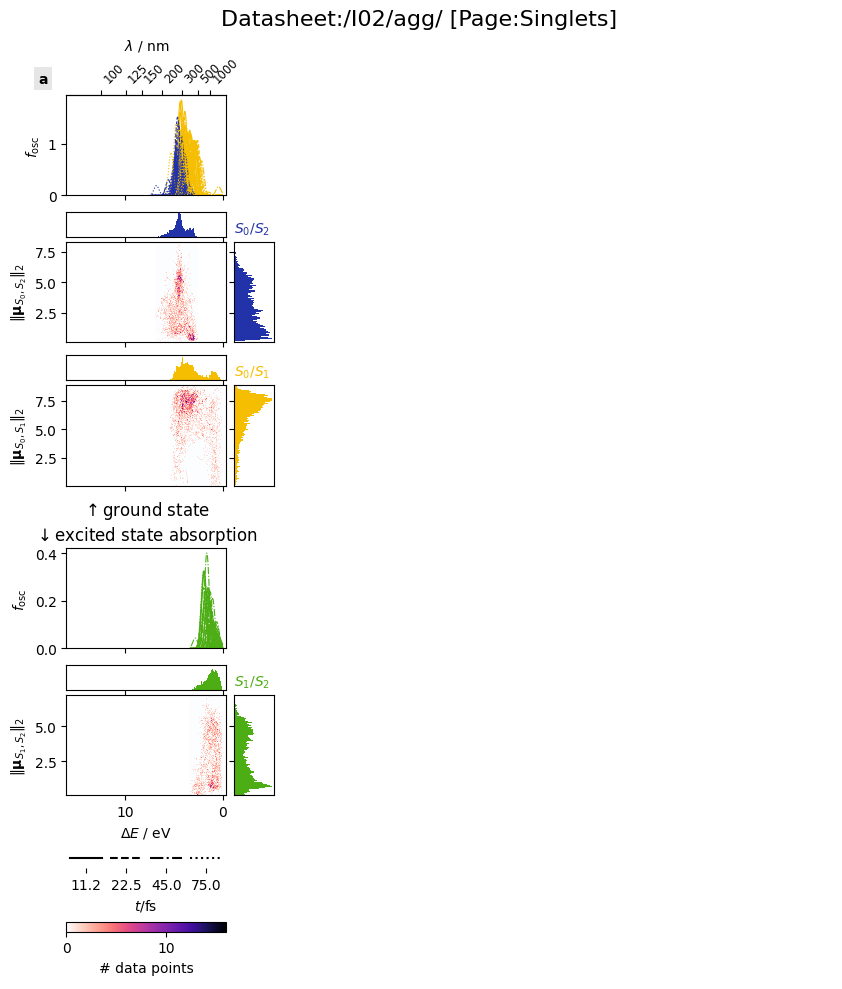

In [17]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_retinal)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_pca_page=True, path="./datasheet_retinal.pdf"
)

sheet = Datasheet(shnitsel_db_retinal_filtered)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True,
    include_pca_page=True,
    path="./datasheet_retinal_filtered.pdf",
)

sheet = Datasheet(shnitsel_db_single_nx)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(include_meta_page=True, include_pca_page=True, path="./triplet_newtonx.pdf")
# sheet.datasheet_pages

sheet = Datasheet(shnitsel_db_single_nx_filtered)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_pca_page=True, path="./triplet_newtonx_filtered.pdf"
)

In [ ]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])
# sel = sel.select_angles([(1,3,7),(0,4,8)])
# sel = sel.select_bonds([[2,6],[5,9]])

: 

: 

: 

: 

: 

: 

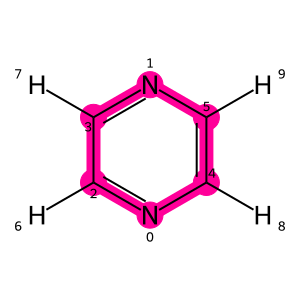

: 

: 

: 

: 

: 

: 

In [ ]:
sel2 = sel.select_bonds(["[#6][#7]"])
# sel = sel.select_atoms(["[#6]"])
sel2 = sel2.select_angles(["[#6]~[#6]~[#7]"])

# sel2.draw(flag_level=2)
sel2.draw(flag_level=3, highlight_color=(1, 0, 0.6))
# sel2.only('bonds')

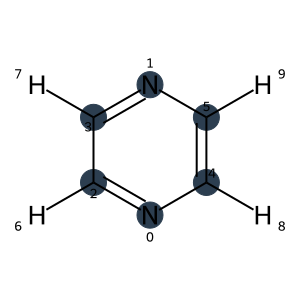

: 

: 

: 

: 

: 

: 

In [ ]:
from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


# res = get_max_chromophor_BLA(concatted_tree.atXYZ, SMARTS='[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]')
# res
res_sel.draw(flag_level=1)
sel.select_all().select_atoms('[#6,#7]').draw(flag_level=1)

In [ ]:
%time sheet.calc_all()

CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.33 ms


: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_per_state_histograms()

CPU times: user 19 μs, sys: 0 ns, total: 19 μs
Wall time: 23.6 μs


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_timeplots()

CPU times: user 10 μs, sys: 0 ns, total: 10 μs
Wall time: 14.3 μs


AttributeError: 'Datasheet' object has no attribute 'plot_timeplots'

: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

CPU times: user 12 μs, sys: 0 ns, total: 12 μs
Wall time: 16.2 μs


AttributeError: 'Datasheet' object has no attribute 'plot_separated_spectra_and_hists'

: 

: 

: 

: 

: 

: 

CPU times: user 45.6 s, sys: 21.1 ms, total: 45.7 s
Wall time: 2.41 s


StopIteration: 

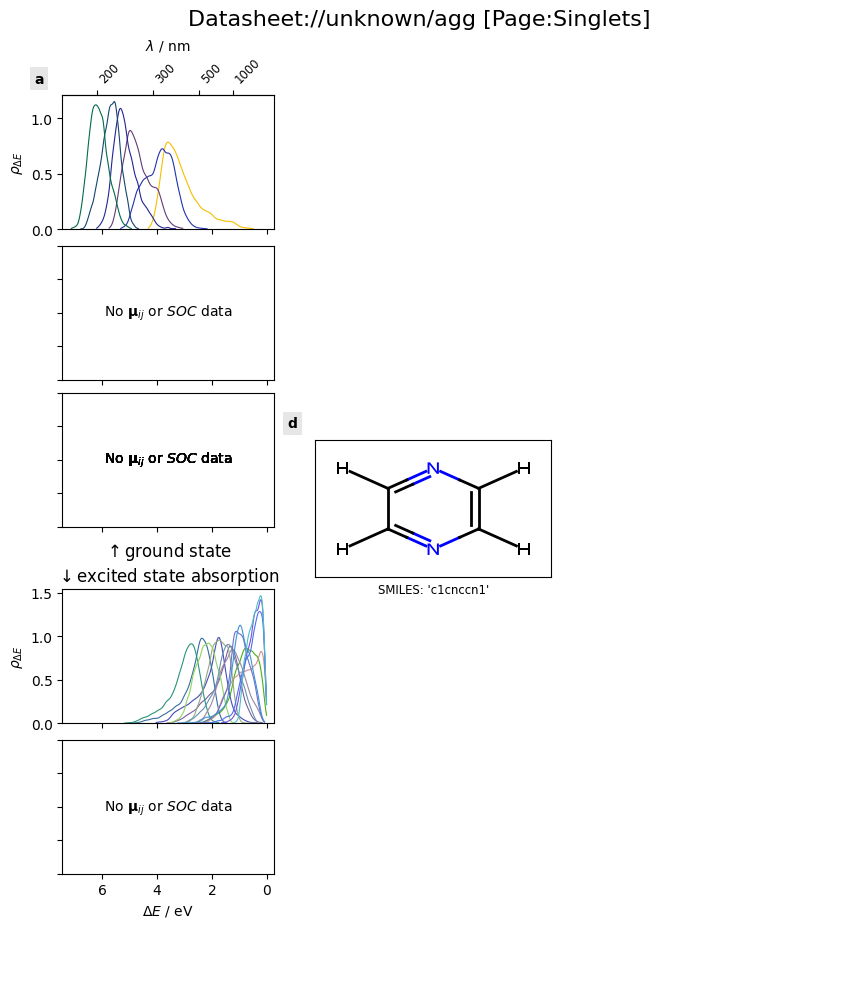

: 

: 

: 

: 

: 

: 

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

: 

: 

: 

: 

: 

: 

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

: 

: 

: 

: 

: 

: 

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

: 

: 

: 

: 

: 

: 

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')

: 

: 

: 

: 

: 

: 